In [1]:
import matplotlib.pyplot as plt
import pickle
import os

# ENCODER_DIR = 'trained_models/encoders/encoder_tissue_224_1024_256_30_1e-05_baseline'
ENCODER_DIR = 'trained_models/encoders/encoder_resnet50_100_0.2'

Minimum validation loss: 82860.0625


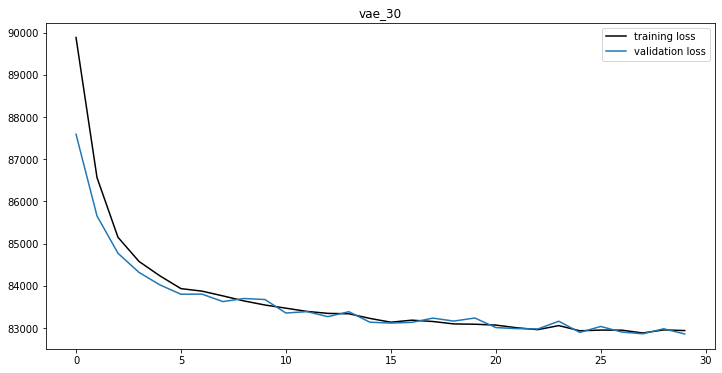

In [11]:
ENCODER_DIR = 'trained_models/vaes/vae_30'

with open(os.path.join(ENCODER_DIR, 'history.pickle'), 'rb') as file:
    history = pickle.load(file)

print('Minimum validation loss:', min(history['val_loss']))

plt.figure(figsize=(12, 6))
plt.title(os.path.split(ENCODER_DIR)[-1])

plt.plot(history['loss'], label='training loss', c='k')
plt.plot(history['val_loss'], label='validation loss')
plt.legend()

# plt.gca().set_yscale('log')
plt.show()

In [118]:
!python evaluate.py

Evaluating model from: trained_models/classifiers/barlow_resnet50_0.2
At the early stop epochs: {'loss': 0.0163, 'acc': 0.99716, 'top_2_accuracy': 0.99988, 'MCC': 0.99581, 'val_loss': 0.34844, 'val_acc': 0.89703, 'val_top_2_accuracy': 0.98203, 'val_MCC': 0.84725}
Found 6935 validated image filenames belonging to 5 classes.
minor: ['junk' 'tils' 'white'] Found 1652 validated image filenames belonging to 5 classes.
major: ['stroma' 'tumor'] Found 5283 validated image filenames belonging to 5 classes.
Number of devices: 4
Encoder trainable: True
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (Non

In [127]:
!python train_classifier.py

Model name: test3_resnet50_0.2
save_dir already exists, continue? (Y/n)  >> ^C
Traceback (most recent call last):
  File "train_classifier.py", line 41, in configure_saving
    os.makedirs(save_dir, exist_ok=False)
  File "/usr/lib/python3.6/os.py", line 220, in makedirs
    mkdir(name, mode)
FileExistsError: [Errno 17] File exists: 'trained_models/classifiers/resnet50/test3_resnet50_0.2'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "train_classifier.py", line 206, in <module>
    main(model_name=f'test3_resnet50_{s}', cifar_resnet=False)
  File "train_classifier.py", line 155, in main
    save_dir = configure_saving(suffix, model_name)
  File "train_classifier.py", line 43, in configure_saving
    input_ = input('save_dir already exists, continue? (Y/n)  >> ')
KeyboardInterrupt
